- Nombre 1: Andrea Sofía Daza
- Nombre 2: Stefanny Figueredo


<p>
<img src=./img/Logo_Uniandes.svg width="20%">
</p>

# Departamento de Ingeniería Mecánica
## IMEC 2001 - Herramientas Computacionales
### Taller 1 - Interpolación y Raices

----
### **<span style="color:#A1CCD1;">Condiciones de la entrega </span>**
----
**1. Fechas de entrega:**
- Nota sobre 5.00 ->  <span style="color:red;">3 de Septiembre a las 23:59, 2023</span>
- Nota sobre 4.00 ->  <span style="color:red;">4 de Septiembre a las 23:59, 2023</span>

**2. Colocar el nombre de los integrantes en la casilla correspondiente<br>**
**3. La entrega del taller es por Bloque Neon y se envía el archivo en formato de Jupyter Notebook (extensión `.ipynb`)<br>**
**4. El nombre del archivo debe ser:** 
- Si trabajó en parejas:`T#_ApellidosIntegrante1_ApellidosIntegrante2` (Ej: `T#_Salamanca_VargasTorres`)
- Si trabajó individual: `T#_Apellido` (Ej: `T#_VargasTorres`)

**5. Comente el código con el proceso que realizó para llegar a la solución.<br>**
**6. <span style="color:red;"> Si se detecta copia con otro de los talleres enviados, automáticamente la nota para los grupos involucrados es 0. </span>**


----
### **<span style="color:#A1CCD1;">Condiciones para el segundo envío </span>**
----
<div class='alert alert-block alert-info'>   

<i class='fa fa-info-circle' aria-hidden='true'></i>
Para poder realizar un segundo envío con correcciones, la nota del **primer envío** debe estar mínimo en **Aprendiz**.
</div>

----
### **Tabla de contenido**
----
### Sección 1: Interpolación [→](#section1)
- 1.1. Punto 1: Interpolación puntos aleatorios
- 1.2. <font color="#276C9B"> Punto 2: Interpolación ciencia de materiales </font> [→](#exercise1)

### Sección 2: Raíces – Solución de Ecuaciones No Lineales [→](#section2)
- 2.1. Raices identificando los puntos 
- 2.2. Esfuerzo de fluencia


In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# No edite este código
def formato_grafica(ax, fig, titulo= "", x_label= "", y_label= "", leyenda=False, xlim=[None, None], ylim=[None, None]):
    
    ax.set_title(titulo)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    ax.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    
    # Utilizarlo si se necesita alguna rotación en los labels de los ejes
#     ax.set_xticklabels(ax.get_xticks(), rotation = 0)
#     ax.set_yticklabels(ax.get_yticks(), rotation = 0)
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])

    # Grid de la gráfica
    ax.grid(True)
    ax.grid(visible=True, which='major', color='grey', linestyle='-')
    ax.minorticks_on()
    ax.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)

    if leyenda == True:
        ax.legend(loc='best', fontsize= 7)

    fig.tight_layout()



## **Punto 1 - Sección Interpolación**
----
<div class='alert alert-block alert-info'>   

<i class='fa fa-info-circle' aria-hidden='true'></i>
A continuación tiene 3 conjuntos de datos para los cuales debe:
1. Utiliza la función de numpy np.arange para generar los puntos x de cada conjunto, estos van de 0 a la longitud de cada uno. 
2. Grafique cada conjunto de datos utilizando [``plt.scatter()``](https://realpython.com/visualizing-python-plt-scatter/)
3. Como puede observar, cada gráfica tiene un comportamiento diferente, teniendo que hay un método de interpolación que da una mejor aproximación. Seleccione **3** métodos de interpolación **uno** para cada conjunto de datos (deben ser distintos) y realice la interpolación. 
4. Grafique en un subplot los puntos que utilizó para la interpolación y los que obtuvo para cada conjunto. 

**Bono:** Para el punto 3 utilizar las funciones de las interpolaciones en una función, intente generalizarla (que funcione para cualqueir caso). Siga el siguiente formato:
``` Python
def fun_1(param_1: tipo, param_2: tipo, ....)-> tipo que se retorna:
    """
    Descripción de la función

    Parameters
    ----------
    param_1 : tipo
        Descripción del parámetro
    param_2 : tipo
        Descripción del parámetro

    Returns
    -------
    variable : tipo
        Descripción de la variable 
    """
    Variables y operaciones con el método de interpolación seleccionado
```
</div>



In [3]:
# Conjuntos de datos
datos_1 = np.array([  0. ,   62.5,  250. ,  562.5, 1000.])
datos_2 = np.array([0.00000000e+00, 9.82812500e+02, 3.12750000e+04, 2.37360938e+05,
                    1.00010000e+06, 3.05191406e+06, 7.59397500e+06, 1.64133922e+07,
                    3.20004000e+07])
datos_3 = np.array([0.        ,   6.12244898,  12.24489796,  18.36734694,
                    24.48979592,  30.6122449 ,  36.73469388,  42.85714286,
                    48.97959184,  55.10204082,  61.2244898 ,  67.34693878,
                    73.46938776,  79.59183673,  85.71428571,  91.83673469,
                    97.95918367, 104.08163265, 110.20408163])

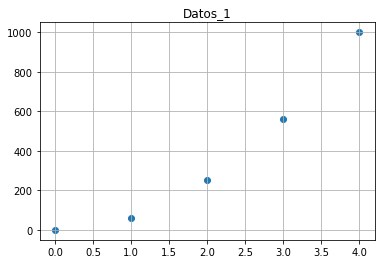

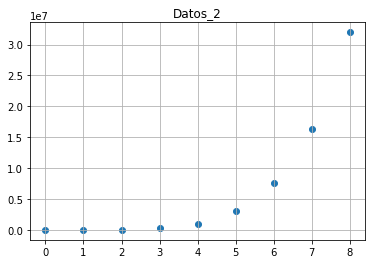

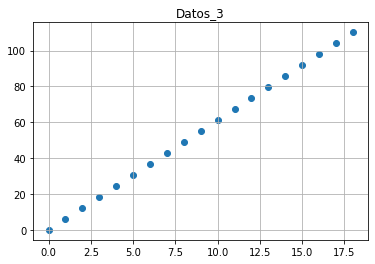

In [4]:
# 1.1. Generar puntos en x
#La función np.arange devuelve un array con valores espaciados equitativamente dentro de un intervalor especificado por el usuario.
%matplotlib inline
x_1 = np.arange(0,len(datos_1))
x_2 = np.arange(0,len(datos_2))
x_3 = np.arange(0,len(datos_3))

plt.figure()
plt.scatter(x_1, datos_1)
plt.title('Datos_1')
plt.grid()

plt.figure()
plt.scatter(x_2, datos_2)
plt.title('Datos_2')
plt.grid()

plt.figure()
plt.scatter(x_3, datos_3)
plt.title('Datos_3')
plt.grid()

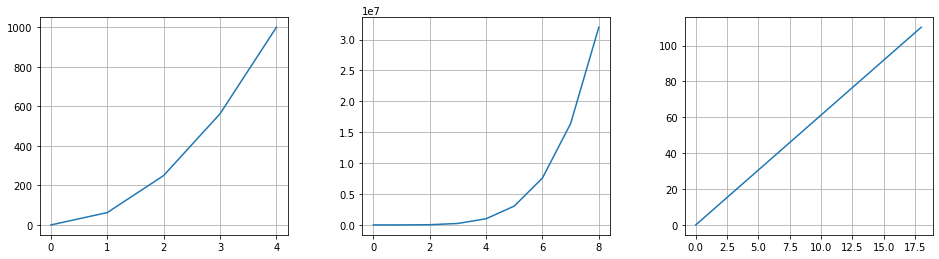

In [5]:
# 1.2. Gráficar en un subplot 3 columnas - 1 fila 


fig = plt.figure(figsize=(16,4))
gs = fig.add_gridspec(nrows=1, ncols=3, hspace=0.1, wspace=0.3)
ax = gs.subplots()
ax[0].grid()
ax[0].plot(x_1, datos_1)
ax[1].grid()
ax[1].plot(x_2, datos_2,)
ax[2].grid()
ax[2].plot(x_3, datos_3,)
plt.show()


In [6]:
# Importar librerías para la interpolación
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import lagrange
# OLS
import numpy as np
import scipy
import sklearn


In [7]:
# 1.3. Métodod interpolación

In [9]:
# Interpolación datos 1

#Los dos parámetros de entrada x y y se utilizan para alguna función f: y = f(x).
#La longitud de y sobre el eje de interpolación debe ser igual a la longitud de x. Por default, el eje de interpolación es el último eje de y.

itp_lineal = scipy.interpolate.interp1d(x_1, datos_1)
y_inter = itp_lineal(x_1)
    
y_interpolacion = inter_lineal(x_1,datos_1)
# Interpolación datos 2
x_f = x_2
itp_spline = scipy.interpolate.splrep(x_2, datos_2, k=3) # k es el grado del spline (para cúbico, k=3)
y_f = scipy.interpolate.splev(x_f, tck=itp_spline)

# Interpolación datos 3
#La función lagrange halla un polinomio que atraviese unos puntos de datos establecidos por el usuario. El resultado es una función polinómica utilizada para estimar los valores de la variable dependiente. 
data = lagrange(x_3, datos_3)
x3F = np.linspace(0,18,20)
y3 = data(x3F)
x3F


array([ 0.        ,  0.94736842,  1.89473684,  2.84210526,  3.78947368,
        4.73684211,  5.68421053,  6.63157895,  7.57894737,  8.52631579,
        9.47368421, 10.42105263, 11.36842105, 12.31578947, 13.26315789,
       14.21052632, 15.15789474, 16.10526316, 17.05263158, 18.        ])

Text(0.5, 1.0, 'Datos_2')

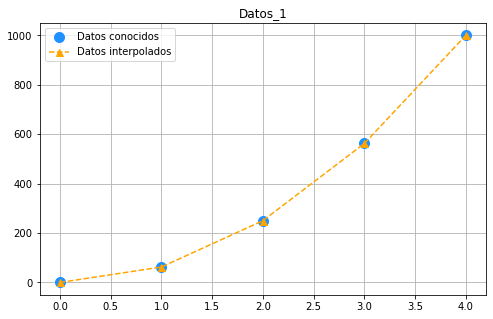

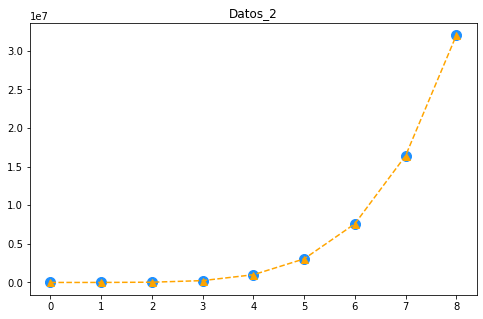

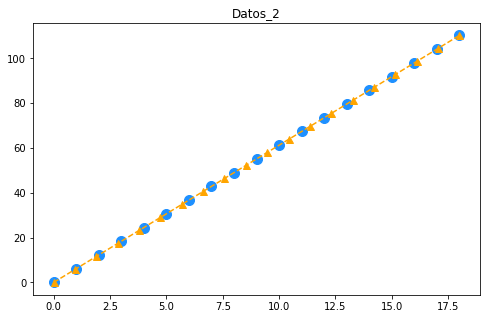

In [10]:
# 1.4. Gráficar los datos interpolados 
#Datos_1
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x_1, datos_1, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(x_1, y_inter, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')
plt.legend()
plt.grid()
plt.title('Datos_1')

#Datos_2
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x_2, datos_2, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(x_2, y_f, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')
plt.title('Datos_2')

#Datos_3
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x_3, datos_3, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(x3F, y3, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')
plt.title('Datos_2')


----
## Punto 2
----

Algunas de las cargas que se pueden encontrar en la ingeniería son de tensión, compresión, torsión y cortante, para el taller se trabajará con el primero. Una de las pruebas que se le realizan a los materiales es la prueba de tensión en donde se deforma la probeta aplicando una carga axial hasta que se llega a la fractura como se muestra en la siguiente imagen:


<p align="center">
<img src=./img/ensayo_tension.jpg width="20%">
</p>

Ahora, se quiere encontrar el esfuerzo de tracción, el cual está definido como:
$$\sigma = \frac{F}{A_0}$$

Siendo $F$ la fuerza que está siendo aplicada y $A$ el área de la sección transversal, de la cual su fórmula para este caso está dada por:

$$A_0 = \pi r^2$$
<p align="center">
<img src=./img/tension.jpg width="20%">
</p>

Ahora, para la deformación unitaria, definida como el cambio entre la longitud inicial y la final, sobre la inicial:

$$\epsilon = \frac{l_i - l_0}{l_0} $$


<div class='alert alert-block alert-info'>   

<i class='fa fa-info-circle' aria-hidden='true'></i>
Se quiere reconstruir la curva de Esfuerzo - Deformación del aluminio 6063, la probeta tiene un diámetro de 9 mm y una longitud inicial de 25 mm. 

Como puede observar, se tienen comportamientos distintos en cada una de las secciones, al igual que en el ejercicio anterior, debe poder recrear la curva utilizando las diferentes funciones de interpolación (si realizó las funciones de la sección pasada las puede utilizar en este punto). Los datos que se suministran para el ejercicio son de fuerza, el tiempo y la extensión de tracción medida por el equipo. 

**2.1. Importe el csv que se encuentra en el repositorio**
- Tenga en cuenta que se tienen dos headers, revise la documentación para presentar un dataFrame con ambos. 
- Agregue **encoding='utf-8'** para que se cargue correctamente el archivo. 

**2.2. Creación DataFrame <br>**
- Con los datos dados cree un DataFrame con los cuales sus columnas sean: (Fuerza, Deformación).
- Encuentre el esfuerzo y la deformación **unitaria** de los datos dados con las fórmulas dadas, estos datos deben quedar en el DataFrame creado como nuevas columnas. 
- **Importante:** Para la deformación unitaria ya se le dan los datos de cuánto se deformó por lo que debe tomar la longitud inicial y dividirla entre el número respectivo. 

**2.3. Grafique los puntos y comente cuáles funciones junto con su librería utilizaría para interpolar cada sección junto con una justificación <br>**
**2.4. Interpole los datos <br>**
**2.5. Grafique la curva con los datos dados y la de los datos del csv.**
- Con esto puede comprobar si su interpolación fue correcta y se acerca a la original.


**Recomendaciones:**
- Divida correctamente los datos para cada sección. 

</div>


In [11]:
# 1. Importe los datos del csv [Tenga en cuenta que se tienen 2 headers]
df = pd.read_csv(r'C:\Users\dazam\OneDrive\Documents\GitHub\a_dazaa_2_HC\Aluminio_6063.csv', header=1,skiprows=0)
df.columns = ['Tiempo (s)', 'Carga (N)', 'Extensión de tracción (mm)']
df.head()

,Tiempo (s),Carga (N),Extensión de tracción (mm)
0,0.0,-0.00466,-0.00006
1,0.1,78.85341,0.00041
2,0.2,286.87579,0.00162
3,0.3,443.49634,0.00261
4,0.4,594.50763,0.00342


In [12]:
# 2. Datos iniciales
# Agregar encabezados a las columnas
df_1 = df[['Carga (N)', 'Extensión de tracción (mm)']]
df_1.columns = ['Fuerza','Deformación']
df_1.head()

,Fuerza,Deformación
0,-0.00466,-0.00006
1,78.85341,0.00041
2,286.87579,0.00162
3,443.49634,0.00261
4,594.50763,0.00342


In [13]:
# 3. Calcular área
area = ((9**2)*np.pi)/4
area

63.61725123519331

In [14]:
# 4. Encontrar esfuerzo y deformación  [Se deja el DataFrame con un header]
def calcular_esfuerzo(carga):
    esfuerzo = carga/area
    return esfuerzo

long_inicial = 25
def calcular_def(ext):
    deformacion = np.abs(((25-ext)-long_inicial)/long_inicial)
    return deformacion

df['Esfuerzo (MPa)'] = df['Carga (N)'].apply(calcular_esfuerzo)
df['Deformación (mm/mm)'] = df['Extensión de tracción (mm)'].apply(calcular_def)
df


,Tiempo (s),Carga (N),Extensión de tracción (mm),Esfuerzo (MPa),Deformación (mm/mm)
0,0.00000,-0.00466,-0.00006,-0.000073,0.000002
1,0.10000,78.85341,0.00041,1.239497,0.000016
2,0.20000,286.87579,0.00162,4.509402,0.000065
3,0.30000,443.49634,0.00261,6.971322,0.000104
4,0.40000,594.50763,0.00342,9.345069,0.000137
...,...,...,...,...,...
1320,132.00000,5899.48535,8.38014,92.734050,0.335206
1321,132.10001,5606.58936,8.38855,88.130016,0.335542
1322,132.20000,5305.30371,8.39691,83.394105,0.335876
1323,132.30000,4989.75439,8.40521,78.433983,0.336208


Text(0.5, 0, 'Deformación [mm/mm]')

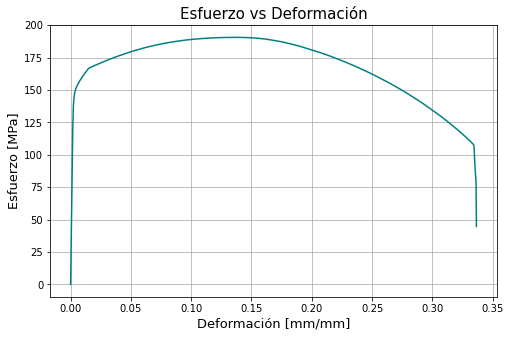

In [15]:
# 5. Gráfica esfuerzo vs deformación 
%matplotlib inline
x = df['Deformación (mm/mm)']
y = df['Esfuerzo (MPa)']
hor = 8
ver = 5

#formato_grafica(0,0,titulo= "Esfuerzo vs Deformación", x_label= "Deformación [mm/mm]", y_label= "Esfuerzo [MPa]", leyenda=False, xlim=[0, 1], ylim=[0, 200])
plt.figure(figsize=(hor, ver))
plt.plot(x, y, color='teal')
plt.grid()
plt.title('Esfuerzo vs Deformación', fontsize=15) # Título
plt.ylabel('Esfuerzo [MPa]', fontsize=13) # Etiqueta eje vertical
plt.xlabel('Deformación [mm/mm]', fontsize=13) # Etiqueta eje horizontal

Para realizar la división del conjunto de datos utilice la siguiente función, tenga en cuenta que este es un ejemplo, debe especificar los límites:

``` pyhton

df[df.apply(lambda x: num_sup >= x['Deformación']>= num_inf axis=1)]
```


In [16]:
# Conjuntos de datos 
df
def dividir_conjunto(df, rango_min_A, rango_max_A, rango_min_B, rango_max_B, rango_min_C, rango_max_C  ):

    f_1 = df[df.apply(lambda x: rango_min_A < x['Deformación (mm/mm)'] < rango_max_A, axis=1)]
    f_2 = df[df.apply(lambda x: rango_min_B < x['Deformación (mm/mm)'] < rango_max_B, axis=1)]
    f_3 = df[df.apply(lambda x: rango_min_C < x['Deformación (mm/mm)'] < rango_max_C, axis=1)]
    
    return (f_1, f_2, f_3)

rango_min_A = 0
rango_max_A = 0.01
rango_min_B = rango_max_A
rango_max_B = 0.33
rango_min_C = rango_max_B
rango_max_C = 0.33652999999999994

f_1, f_2, f_3 = dividir_conjunto(df, rango_min_A, rango_max_A, rango_min_B, rango_max_B, rango_min_C, rango_max_C,)

#Ahora se aplicará una interpolación para cada

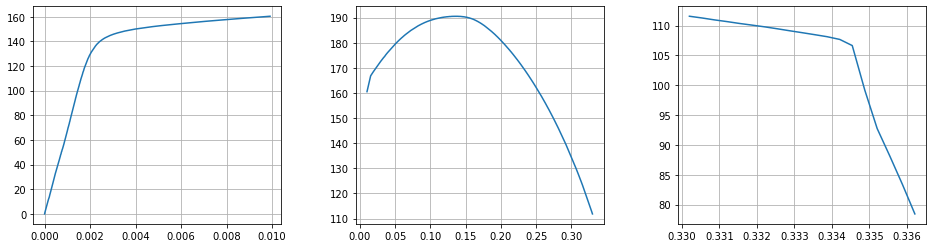

In [17]:
# Subplot (1x3) de cada tramo

fig = plt.figure(figsize=(16,4))
gs = fig.add_gridspec(nrows=1, ncols=3, hspace=0.1, wspace=0.3)
ax = gs.subplots()
x_ticks = np.linspace(-2, 2, 100)
y_ticks = np.sin(x_ticks)
ax[0].grid()
ax[0].plot(f_1['Deformación (mm/mm)'], f_1['Esfuerzo (MPa)'],)
ax[1].grid()
ax[1].plot(f_2['Deformación (mm/mm)'], f_2['Esfuerzo (MPa)'],)
ax[2].grid()
ax[2].plot(f_3['Deformación (mm/mm)'], f_3['Esfuerzo (MPa)'],)
plt.show()


In [18]:
f_1

,Tiempo (s),Carga (N),Extensión de tracción (mm),Esfuerzo (MPa),Deformación (mm/mm)
0,0.0,-0.00466,-0.00006,-0.000073,0.000002
1,0.1,78.85341,0.00041,1.239497,0.000016
2,0.2,286.87579,0.00162,4.509402,0.000065
3,0.3,443.49634,0.00261,6.971322,0.000104
4,0.4,594.50763,0.00342,9.345069,0.000137
...,...,...,...,...,...
314,31.4,10158.53418,0.23567,159.682067,0.009427
315,31.5,10168.84668,0.23873,159.844169,0.009549
316,31.6,10179.63672,0.24184,160.013778,0.009674
317,31.7,10190.81934,0.24488,160.189558,0.009795


In [19]:
f_2

,Tiempo (s),Carga (N),Extensión de tracción (mm),Esfuerzo (MPa),Deformación (mm/mm)
319,31.90000,10212.07422,0.25074,160.523663,0.010030
320,32.00000,10221.48633,0.25369,160.671612,0.010148
321,32.10000,10232.30664,0.25679,160.841697,0.010272
322,32.20000,10242.96777,0.25998,161.009279,0.010399
323,32.30000,10254.09180,0.26292,161.184138,0.010517
...,...,...,...,...,...
1300,130.00000,7189.86084,8.21353,113.017471,0.328541
1301,130.10001,7170.80420,8.22184,112.717919,0.328874
1302,130.20000,7151.34033,8.23019,112.411967,0.329208
1303,130.30000,7132.73242,8.23839,112.119469,0.329536


In [20]:
f_3

,Tiempo (s),Carga (N),Extensión de tracción (mm),Esfuerzo (MPa),Deformación (mm/mm)
1305,130.50000,7098.07324,8.25510,111.574661,0.330204
1306,130.60001,7079.58643,8.26352,111.284067,0.330541
1307,130.70000,7059.14502,8.27182,110.962748,0.330873
1308,130.80000,7041.12158,8.28007,110.679437,0.331203
1309,130.89999,7021.36719,8.28837,110.368918,0.331535
1310,131.00000,7003.62891,8.29668,110.090090,0.331867
1311,131.10001,6985.16504,8.30514,109.799856,0.332206
1312,131.20000,6964.60596,8.31355,109.476688,0.332542
1313,131.30000,6943.49365,8.32175,109.144823,0.332870
1314,131.39999,6922.91064,8.33010,108.821279,0.333204


In [22]:
# Selección de las columnas de interés ¿Cuáles son?
#Igual que para la realización de la gráfica anterior, las columnas de interés corresponden a esfuerzo (y) y deformación (x).
f_1
f_2
f_3
f_1F = f_1[['Esfuerzo (MPa)', 'Deformación (mm/mm)']]
f_2F = f_2[['Esfuerzo (MPa)', 'Deformación (mm/mm)']]
f_3F = f_3[['Esfuerzo (MPa)', 'Deformación (mm/mm)']]



In [23]:
f_1F

,Esfuerzo (MPa),Deformación (mm/mm)
0,-0.000073,0.000002
1,1.239497,0.000016
2,4.509402,0.000065
3,6.971322,0.000104
4,9.345069,0.000137
...,...,...
314,159.682067,0.009427
315,159.844169,0.009549
316,160.013778,0.009674
317,160.189558,0.009795


In [24]:
# DataFrame conjunto 2
f_2F

,Esfuerzo (MPa),Deformación (mm/mm)
319,160.523663,0.010030
320,160.671612,0.010148
321,160.841697,0.010272
322,161.009279,0.010399
323,161.184138,0.010517
...,...,...
1300,113.017471,0.328541
1301,112.717919,0.328874
1302,112.411967,0.329208
1303,112.119469,0.329536


In [25]:
# DataFrame conjunto 3
f_3F

,Esfuerzo (MPa),Deformación (mm/mm)
1305,111.574661,0.330204
1306,111.284067,0.330541
1307,110.962748,0.330873
1308,110.679437,0.331203
1309,110.368918,0.331535
1310,110.090090,0.331867
1311,109.799856,0.332206
1312,109.476688,0.332542
1313,109.144823,0.332870
1314,108.821279,0.333204


In [26]:
# Función para la selección de datos aleatorios[¡No modifique esta función!]
def newData(data_s_c: pd.DataFrame, c: pd.DataFrame, col_1: str, col_2: str, percentage: float):
    """
    función para la selección de datos aleatorios dados un porcentaje

    Parameters
    ----------
    data_s_c : pd.DataFrame
        Conjunto de datos con las columnas especificadas
    c : pd.DataFrame
        Conjunto completo de los datos
    col_1 : str
        Primera columna de interés
    col_2 : str
        Segunda columna de interés
    percentage : float
        Porcentaje de los datos que se quiere incluir

    Returns
    -------
    data_s_c1_ : pd.DataFrame
        Datos aleatorios del conjunto de datos
    """
    data_s_c1 = c[[col_1, col_2]]
    data_s_c1_ = data_s_c.head(1)
    data_s_c1_ = pd.concat([data_s_c1_,
                       c[[col_1, col_2]].sample(n=int(np.round(len(c[col_1])*percentage,0)), random_state=1)])
    data_s_c1_.sort_index(inplace=True)
    data_s_c1_ = pd.DataFrame(np.insert(data_s_c1_.values, len(data_s_c1_), 
                                        values=list(data_s_c1.iloc[-1]),
                                        axis=0), columns = [col_1, col_2])
    data_s_c1_ = data_s_c1_.drop_duplicates()
    data_s_c1_ = data_s_c1_.reset_index(drop=True)
    return data_s_c1_


Seleccionados los 3 conjuntos de datos se debe disminuir la cantidad de puntos para realizar el ejercicio de la interpolación, por lo que utilizando la función anterior [**newData**] debe utilizar los siguientes porcentajes según el conjunto de datos:
- Conjunto 1: 20%
- Conjunto 2: 4%
- Conjunto 3: 100% [Si tiene más de 19 datos disminuya a 80%]

In [27]:
#Datos seleccionados tramo 1
f_1F
datos_T1 = newData(f_1F, f_1, 'Esfuerzo (MPa)', 'Deformación (mm/mm)', 0.2)
datos_T1


,Esfuerzo (MPa),Deformación (mm/mm)
0,-0.000073,0.000002
1,9.345069,0.000137
2,18.959620,0.000281
3,21.885129,0.000322
4,23.052612,0.000343
...,...,...
60,156.191788,0.007048
61,158.144429,0.008344
62,159.844169,0.009549
63,160.013778,0.009674


In [28]:
# Datos seleccionados tramo 2
f_2F
datos_T2 = newData(f_2F, f_2, 'Esfuerzo (MPa)', 'Deformación (mm/mm)', 0.04)
datos_T2

,Esfuerzo (MPa),Deformación (mm/mm)
0,160.523663,0.010030
1,161.487020,0.010764
2,173.352783,0.031535
3,178.204706,0.045868
4,183.633136,0.066202
5,185.591457,0.075873
6,186.194336,0.079207
7,186.324985,0.080201
8,186.453746,0.080870
9,187.864097,0.090541


In [29]:
# Datos seleccionados tramo 3 
f_3F
datos_T3 = newData(f_3F, f_3, 'Esfuerzo (MPa)', 'Deformación (mm/mm)', 0.8)
datos_T3

,Esfuerzo (MPa),Deformación (mm/mm)
0,111.574661,0.330204
1,111.284067,0.330541
2,110.962748,0.330873
3,110.679437,0.331203
4,110.368918,0.331535
5,109.799856,0.332206
6,109.476688,0.332542
7,108.821279,0.333204
8,108.489392,0.333536
9,106.658365,0.334541


Text(0.5, 0, 'Deformación [mm/mm]')

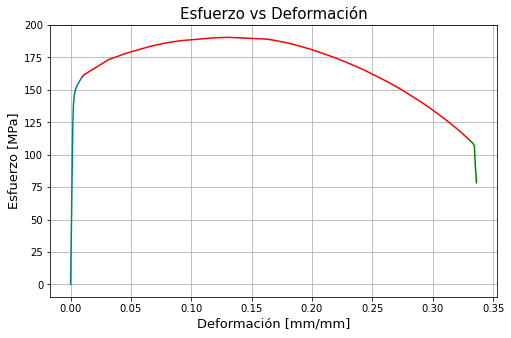

In [30]:
# Evaluar el comportamiento de cada tramo con los datos seleccionados 
#Para tramo 1
x_1 = datos_T1['Deformación (mm/mm)']
y_1= datos_T1['Esfuerzo (MPa)']

x_2 = datos_T2['Deformación (mm/mm)']
y_2 = datos_T2['Esfuerzo (MPa)']

x_3 = datos_T3['Deformación (mm/mm)']
y_3 = datos_T3['Esfuerzo (MPa)']
hor = 8
ver = 5

#formato_grafica(0,0,titulo= "Esfuerzo vs Deformación", x_label= "Deformación [mm/mm]", y_label= "Esfuerzo [MPa]", leyenda=False, xlim=[0, 1], ylim=[0, 200])
plt.figure(figsize=(hor, ver))
plt.plot(x_1, y_1, color='teal')
plt.plot(x_2, y_2, color = 'red')
plt.plot (x_3, y_3, color = 'green')
plt.grid()
plt.title('Esfuerzo vs Deformación', fontsize=15) # Título
plt.ylabel('Esfuerzo [MPa]', fontsize=13) # Etiqueta eje vertical
plt.xlabel('Deformación [mm/mm]', fontsize=13) # Etiqueta eje horizontal



In [31]:
# Datos de x y y para cada conjunto de datos [Se recomienda pasarlo a un array después de seleccionar la columna del DatFrame]
datos_T1 #Primer tramo: región elástica
datos_T2 #Segundo tramo: región plástica
datos_T3 #Tercer tramo: Punto de quiebre


,Esfuerzo (MPa),Deformación (mm/mm)
0,111.574661,0.330204
1,111.284067,0.330541
2,110.962748,0.330873
3,110.679437,0.331203
4,110.368918,0.331535
5,109.799856,0.332206
6,109.476688,0.332542
7,108.821279,0.333204
8,108.489392,0.333536
9,106.658365,0.334541


In [32]:
# Realizar interpolación 

#Interpolación para primer tramo: región elástica
 
# PASO 1. Creamos el interpolador lineal
xx = datos_T1['Deformación (mm/mm)']
yy = datos_T1['Esfuerzo (MPa)']
itp_lineal = scipy.interpolate.interp1d(xx, yy)

# PASO 2. Evaluamos el interpolador lineal
y_inter_1 = itp_lineal(xx)
y_inter_1

#Interpolación para segundo tramo: región plástica 
# PASO 1. Creamos el interpolador spline cuadrático
x = datos_T2['Deformación (mm/mm)']
y = datos_T2['Esfuerzo (MPa)']
itp_spline = scipy.interpolate.splrep(x, y, k=2) # k es el grado del spline (para cuadrático, k=2)

# PASO 2. Evaluamos el interpolador spline cúbico
a= datos_T2['Deformación (mm/mm)'].min()
b = datos_T2['Deformación (mm/mm)'].max()

x_new = np.linspace(start =a, stop=b, num=14)
y_new = scipy.interpolate.splev(x_new, tck=itp_spline)
y_new

#Interpolación tramo 3: punto de quiebre 

# PASO 1. Creamos el interpolador lineal
xx1 = datos_T3['Deformación (mm/mm)']
yy1 = datos_T3['Esfuerzo (MPa)']
itp_lineal = scipy.interpolate.interp1d(xx1, yy1)

# PASO 2. Evaluamos el interpolador lineal
y_inter_2 = itp_lineal(xx1)
y_inter_2



array([111.57466099, 111.2840667 , 110.96274804, 110.67943747,
       110.36891808, 109.79985624, 109.47668792, 108.82127891,
       108.48939157, 106.65836512,  99.17885035,  92.73404989,
        88.13001585,  83.3941047 ,  78.43398281])

Text(0.5, 0, 'Deformación [mm/mm]')

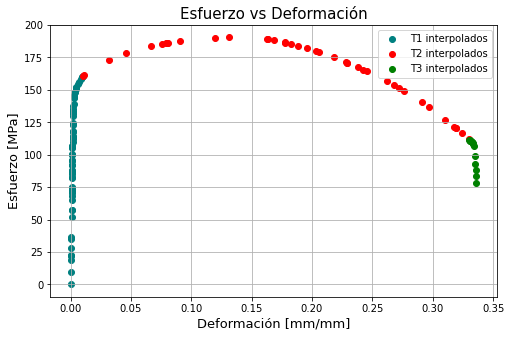

In [33]:
# Evaluar el comportamiento de cada tramo

x_1 = xx
y_1= y_inter_1

x_2 = x
y_2 = y
x_3 = xx1
y_3 = y_inter_2
hor = 8
ver = 5

#formato_grafica(0,0,titulo= "Esfuerzo vs Deformación", x_label= "Deformación [mm/mm]", y_label= "Esfuerzo [MPa]", leyenda=False, xlim=[0, 1], ylim=[0, 200])
plt.figure(figsize=(hor, ver))
plt.scatter(x_1, y_1, color='teal', label = 'T1 interpolados')
plt.scatter(x_2, y_2, color = 'red', label = 'T2 interpolados')
plt.scatter (x_3, y_3, color = 'green', label = 'T3 interpolados')
plt.legend()
plt.grid()
plt.title('Esfuerzo vs Deformación', fontsize=15) # Título
plt.ylabel('Esfuerzo [MPa]', fontsize=13) # Etiqueta eje vertical
plt.xlabel('Deformación [mm/mm]', fontsize=13) # Etiqueta eje horizontal




Text(0.5, 0, 'Deformación [mm/mm]')

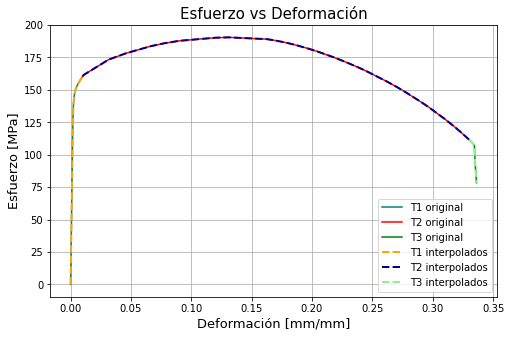

In [34]:
# Evaluar el comportamiento de cada tramo en conjunto [Debe poder reconstruir la curva]
x_1 = datos_T1['Deformación (mm/mm)']
y_1= datos_T1['Esfuerzo (MPa)']

x_2 = datos_T2['Deformación (mm/mm)']
y_2 = datos_T2['Esfuerzo (MPa)']

x_3 = datos_T3['Deformación (mm/mm)']
y_3 = datos_T3['Esfuerzo (MPa)']

x_3 = xx1
y_3 = y_inter_2
hor = 8
ver = 5

#formato_grafica(0,0,titulo= "Esfuerzo vs Deformación", x_label= "Deformación [mm/mm]", y_label= "Esfuerzo [MPa]", leyenda=False, xlim=[0, 1], ylim=[0, 200])
plt.figure(figsize=(hor, ver))
plt.plot(x_1, y_1, color='teal', label = 'T1 original')
plt.plot(x_2, y_2, color = 'red', label = 'T2 original')
plt.plot (x_3, y_3, color = 'green', label = 'T3 original')
plt.plot(xx,y_inter_1,color = 'orange', linestyle='dashed', linewidth=2, label = 'T1 interpolados')
plt.plot(x,y, color = 'darkblue',linestyle='dashed', linewidth=2, label = 'T2 interpolados')
plt.plot(xx1,y_inter_2,color = 'lightgreen', linestyle='dashed', linewidth=2, label = 'T3 interpolados')
plt.legend()
plt.grid()
plt.title('Esfuerzo vs Deformación', fontsize=15) # Título
plt.ylabel('Esfuerzo [MPa]', fontsize=13) # Etiqueta eje vertical
plt.xlabel('Deformación [mm/mm]', fontsize=13) # Etiqueta eje horizontal


## **Punto 3 - Sección Raíces**
----

<p align="center">
<img src=./img/Ejercicio_2.png width="30%">
</p>


En la figura anterior tiene dos curvas con las cuales debe:
1. Obtener datos de x y y de cada una
2. Interpole los datos (Esto con el fin de aproximar mejor la solución)
2. Utilizando la librería polyfit de numpy y los datos del literal anterior encuentre las ecuaciones de las curvas.
3. Teniendo las ecuaciones diga cuál sería la raíz para este caso. 
4. Encuentre la raíz utilizando las ecuaciones encontradas. 


In [35]:
# Puntos con las curvas

import numpy as np
import scipy
import matplotlib.pyplot as plt
# Puntos con las curvas
x1=[-1,-0.5,0,0.5,1,1.5]
y1=[-6 , -5.5,-5,-4.5,-4,-3.5]
#puntos de la cuadratica
xx = [-2, -1.5, -1, 0,0.5,1,1.5]
yy = [-3, -4.5, -5.5, -6, -5.5, -4.5,-3]
# interpolacion 
# PASO 1. Creamos el interpolador lineal
aitp_lineal = scipy.interpolate.interp1d(x1, y1)

# PASO 2. Evaluamos el interpolador lineal
ay_inter = aitp_lineal(x1)
#para la cuadratica 

# PASO 1. Creamos el interpolador lineal
itp_lineal = scipy.interpolate.interp1d(xx, yy)

# PASO 2. Evaluamos el interpolador lineal
y_inter = itp_lineal(xx)

# Ineterpolación de los puntos


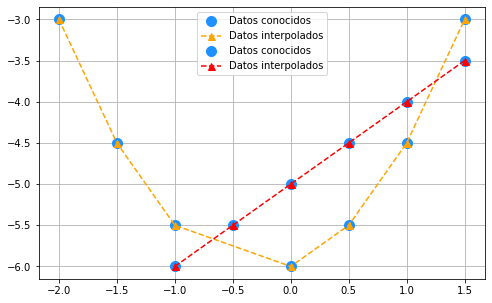

In [36]:
# Graficar puntos [Reconstrucción de la gráfica inicial]
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(xx, yy, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(xx, y_inter, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')
plt.plot(x1, y1, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(x1, ay_inter, linestyle='--', marker='^', color='red', ms=7, label='Datos interpolados')
plt.legend()
plt.grid()


In [37]:
# Encontrar ecuaciones curva 1
c=np.polyfit(x1,y1,1)
lineal=np.poly1d(c)
print("polinomio de ajuste",lineal)
valor=-1
resultado=lineal(valor)
print (resultado)

polinomio de ajuste  
1 x - 5
-6.0


In [38]:
# Encontrar ecuaciones curva 2
c1=np.polyfit(xx,yy,2)
a,b,c=c1
cuadratica = f"y = {a:.2f}x**2 + {b:.2f}x + {c:.2f}"
print("funcion",cuadratica)

funcion y = 1.00x**2 + 0.50x + -6.00


In [39]:
# Encontrar raices 
from scipy.optimize import fsolve
def funcion(x):
    return  x - 5 - (1.00*x**2 + 0.50*x + -6.00)
x_probable=[-0.7]
solucion=fsolve(funcion, x_probable)
print ("La primera raiz x1 es ",solucion)
x1_probable=[1.3]
solucion2=fsolve(funcion, x1_probable)
print ("La segunda raiz x2 es ",solucion2) 

La primera raiz x1 es  [-0.78077641]
La segunda raiz x2 es  [1.28077641]


## Punto 4
----

Uno de los puntos importantes que se obtienen con la curva esfuerzo vs deformación es el esfuerzo de fluencia $S_{y}$, este se define como el esfuerzo máximo que se puede desarrollar en un material sin causar una deformación plástica[1]. Este se puede encontrar trazando una línea paralela y que parte desde el 0.002 en el eje x que es el que tiene la deformación, cuando se interseca con la curva original del material es cuando se obtiene su valor. 

1. Utilizando algunos puntos del primer tramo del punto 2, encuentre el módulo de Young. 
- Para que no se tengan errores con la función de *polyfit* utilizar con los valores escogidos utilice np.array(x).reshape(-1,).
2. Se quiere encontrar el esfuerzo de Fluencia para lo cual de los puntos que seleccionó anteriormente al ser un array: 
- 2.1. En una nueva variable sumele a la deformación 0.002.
- 2.2. Encuentre la ecuación utilzando los nuevos x (deformacion) y el y (Esfuerzo) del literal 1.
- 2.3. Para realizar la paralela y que cruce la curva inicial defina una variable que van a ser los nuevos puntos x utilizando como punto inicial el x[0] de la deformación desplazada. 
- 2.4. Evalúe los valores del 2.3. en la ecuación del punto 2.2.

3. Grafique la recta encontrada junto con la gráfica de esfuerzo deformación del tramo correspondiente.
4. Como puede evidenciar en donde se corta con la curva original si se delimita entre 0.00314 y 0.008 se tiene una recta. Encuentre la ecuación de esta recta.
5. En este caso se encuentra que se tiene un problema de raices, siendo esta en donde se intersecan las rectas. Encuentre el esfuerzo de fluencia del material y compare con la literatura. 


[1] https://www.instron.com/es-es/resources/glossary/y/yield-strength

Módulo de Young: 78.89


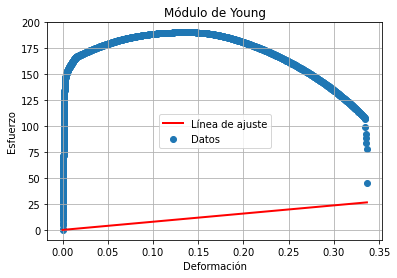

In [40]:
#Punto 1.1. Selección datos x y y para encontrar el módulo de Young

esfuerzo=df['Esfuerzo (MPa)']
deformacion=df['Deformación (mm/mm)']
pendiente, _ = np.polyfit(deformacion , esfuerzo, 1)

# Visualizar los datos y la línea de ajuste
plt.scatter(deformacion , esfuerzo, label='Datos')
plt.plot(deformacion, pendiente * deformacion, color='red', linewidth =2, label='Línea de ajuste')
plt.xlabel('Deformación')
plt.ylabel('Esfuerzo')
plt.legend()
plt.title('Módulo de Young')
plt.grid(True)

# Mostrar el resultado
print(f"Módulo de Young: {pendiente:.2f}")
plt.show()

deformacion2= df['Deformación (mm/mm)']+0.002

In [41]:
# Encontrar ecuación de la recta [Módulo de Young]
pendiente, ordenada_al_origen = np.polyfit(deformacion, esfuerzo, 1)

# La ecuación de la recta es y = mx + b, donde m es la pendiente y b es la ordenada al origen
ecuacion_recta = f"Ecuación de la recta: y = {pendiente:.2f}x + {ordenada_al_origen:.2f}"

# Mostrar la ecuación de la recta
print("ecuacion de la recta sin desplazar",ecuacion_recta)

ecuacion de la recta sin desplazar Ecuación de la recta: y = 78.89x + 142.87


In [42]:
# 2.1. Desplazar la gráfica al 0.0002

esfuerzo=df['Esfuerzo (MPa)'].iloc[:230]
deformacion_desplazada=df['Deformación (mm/mm)'].iloc[:230]
deformacion_desplazada=deformacion_desplazada+0.002
# 2.2. Encontrar la ecuación 

pendiente, ordenada_al_origen = np.polyfit(deformacion_desplazada, esfuerzo, 1)

# La ecuación de la recta es y = mx + b, donde m es la pendiente y b es la ordenada al origen
ecuacion_recta = f"Ecuación de la recta desplazada: y = {pendiente:.2f}x + {ordenada_al_origen:.2f}"

# Mostrar la ecuación de la recta
print(ecuacion_recta)

# 2.2. Encontrar la ecuación 


Ecuación de la recta desplazada: y = 64565.98x + -126.18


In [43]:
# 2.3. - 2.4. Creación de datos para graficar

x = df['Deformación (mm/mm)']
y = df['Esfuerzo (MPa)']
x1=np.linspace(0,0.6,50)
m = 64284.09  # Pendiente
b = -125.31  # Ordenada al origen
y1= m * x1 + b  # Ecuación de la recta

In [44]:
# 3. Gráfica


Text(0, 0.5, 'Esfuerzo [Mpa]')

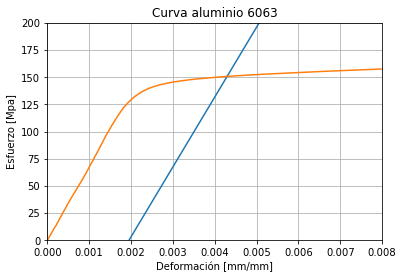

In [93]:
# 4. Delimitar rangos esfuerzo deformación del tramo de interés  
# 4. Delimitar rangos esfuerzo deformación del tramo de interés  
plt.plot(x1, y1, label='y = 2x + 3')
plt.grid()
plt.plot(x, y, label='y = 2x + 3')

plt.xlim(0,0.008)
plt.ylim(0,200)
plt.title('Curva aluminio 6063')
plt.xlabel('Deformación [mm/mm]')
plt.ylabel('Esfuerzo [Mpa]')

In [40]:
# 4.1. Encontrar ecuación de la recta


In [45]:
# 5. Encontrar Raiz       
x = df['Deformación (mm/mm)']
y = df['Esfuerzo (MPa)']
x1=np.linspace(0,0.6,50)
m = 64284.09  # Pendiente
b = -125.31  # Ordenada al origen
y1= m * x1 + b  # Ecuación de la recta

# Encontrar las intersecciones entre la recta y el conjunto de puntos (x2, y2)
intersecciones = []

for i in range(len(x1)):
    if (x1[i], y1[i]) in zip(x, y):
        intersecciones.append((x1[i], y1[i]))

#Imprimir las intersecciones

for interseccion in intersecciones:
    print(f'Intersección en ({interseccion[0]}, {interseccion[1]})')
